In [ ]:
import matplotlib 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import sklearn
from sklearn.linear_model import LinearRegression

In [38]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

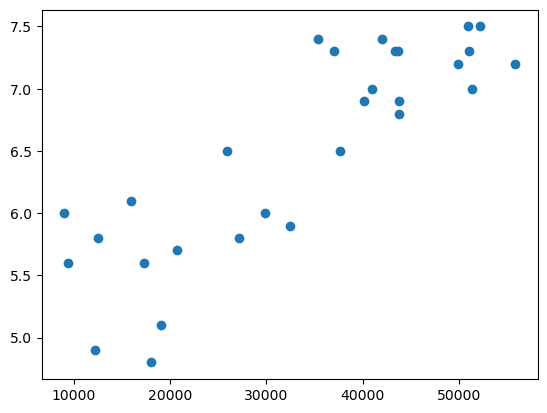

array([[5.96242338]])

In [41]:
oecd_df = pd.read_csv("./datasets/lifesat/oecd_bli_2015.csv")
# oecd_df
gdp_df = pd.read_csv("./datasets/lifesat/gdp_per_capita.csv", thousands=",", delimiter='\t', encoding='latin1')
# gdp_df
data = prepare_country_stats(oecd_df, gdp_df)
data
X = np.c_[data["GDP per capita"]]
y = np.c_[data["Life satisfaction"]]
plt.scatter(X, y)
plt.show()
reg = LinearRegression().fit(X, y)
reg.coef_
reg.score(X, y)
X_hat = [[22587]]
y_hat = reg.predict(X_hat)
y_hat